In [ ]:
!pip install transformers
!pip install sentencepiece
!pip install jiwer
!pip install datasets
!pip install evaluate
!pip install -U accelerate

!pip install matplotlib
!pip install tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.8 MB/s eta 0:00:00
   ━━

In [ ]:
import os
import torch
import evaluate
import numpy as np
import pandas as pd
import glob as glob
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from PIL import Image
from tqdm.notebook import tqdm
from dataclasses import dataclass
from torch.utils.data import Dataset
from transformers import (
    VisionEncoderDecoderModel,
    TrOCRProcessor,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    default_data_collator
)

block_plot = False
plt.rcParams['figure.figsize'] = (12, 9)

In [ ]:
os.environ["TOKENIZERS_PARALLELISM"] = 'True'

In [ ]:
def seed_everything(seed_value):
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed_everything(42)

In [ ]:
# device = xm.xla_device()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
@dataclass(frozen=True)
class TrainingConfig:
    BATCH_SIZE:    int = 32
    EPOCHS:        int = 12
    LEARNING_RATE: float = 0.00005

@dataclass(frozen=True)
class DatasetConfig:
    DATA_ROOT:     str = '/kaggle/input'

@dataclass(frozen=True)
class ModelConfig:
    MODEL_NAME: str = 'microsoft/trocr-small-handwritten'
@dataclass(frozen=True)
class Config:

    # torch parameters
    float32_matmul_precision = "high"
    seed = 42

    # dataset parameters
    train_dataset_path = "OleehyO/latex-formulas"
    split_dataset_name = "cleaned_formulas"
    val_test_size = 0.2

    # model parameters
    tokenizer_name = "gpt2"
    feature_extractor = "microsoft/swin-base-patch4-window7-224-in22k"
    encoder_name = "microsoft/swin-base-patch4-window7-224-in22k"
    decoder_name = "gpt2"
    max_length=512

    # training parameters
    num_epochs = 40
    batch_size_train = 16
    batch_size_val = 16
    learning_rate = 1e-4
    warmup_steps = 400
    max_grad_norm = 1.0
    betas = (0.95, 0.98)
    eps=1e-08

    # image parameters
    image_size=(224, 468)

    # checkpoint parameters
    checkpoint_dir = "checkpoints"
    eval_steps = 200

    # metric parameters
    bleu = "google_bleu"

In [ ]:
DatasetConfig.DATA_ROOT

'/kaggle/input'

In [ ]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib import rcParams

# # Function to check if a LaTeX formula is parsable
# def is_latex_parsable(latex_string):
#     try:
#         # Attempt to parse the LaTeX string
#         plt.figure()  # Create a new figure to avoid errors
#         plt.title(latex_string, fontsize=12)  # Set title with LaTeX
#         plt.close()  # Close the figure
#         return True
#     except Exception:
#         return False

# # Load the Excel file
# file_path = '/kaggle/input/handwritten-eq-to-latex-conv-dataset/HandwrittenData/train_hw.csv'  # Replace with your Excel file path
# df = pd.read_csv(file_path)

# # Get the list of filenames in the specified folder
# folder_path = '/kaggle/input/handwritten-eq-to-latex-conv-dataset/HandwrittenData/images/train'  # Replace with the folder containing images
# image_files = set(os.listdir(folder_path))  # Set of filenames in the folder

# # Filter out rows where the formula is not LaTeX parsable
# df = df[df['formula'].apply(is_latex_parsable)]

# # Filter out rows where the image file is not present in the folder
# df = df[df['image'].isin(image_files)]

# # Save the filtered DataFrame to a new Excel file
# output_file_path = 'filtered_output.csv'  # Specify your desired output file name
# df.to_csv(output_file_path, index=False)

# print(f"Filtered DataFrame saved successfully to {output_file_path}!")


In [ ]:


# test_ds = pd.read_csv(
#     "/kaggle/input/handwritten-eq-to-latex-conv-dataset/HandwrittenData/val_hw.csv",
#     header=None,
#     skiprows=1,
#     names=['image', 'formula']
# )

In [ ]:
# results_df

In [ ]:
!pip install peft

In [ ]:
import torch

# Clear all cache on the GPU
torch.cuda.empty_cache()

# You can also reset all memory allocations (optional):
torch.cuda.reset_peak_memory_stats()
torch.cuda.reset_accumulated_memory_stats()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |  13426 MiB |  13426 MiB |      0 B   |      0 B   |\n|       from large pool |  12863 MiB |  12863 MiB |      0 B   |      0 B   |\n|       from small pool |    562 MiB |    562 MiB |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |  13426 MiB |  13426 MiB |      0 B   |      0 B   |\n|       from large pool |  12863 MiB |  12863 MiB |

In [ ]:
# res=trainer.train(resume_from_checkpoint='/kaggle/working/trocr_handwritten/checkpoint-6770')

In [ ]:
import os
import torch
import torch.distributed as dist

# Set environment variables manually for local testing
os.environ['RANK'] = '0'                # Rank of the current process
os.environ['LOCAL_RANK'] = '0'          # Local rank of the process
os.environ['WORLD_SIZE'] = '1'          # Total number of processes
os.environ['MASTER_ADDR'] = 'localhost' # Address of the master node (could be an IP address)
os.environ['MASTER_PORT'] = '29500'     # Port for communication

# Distributed process group initialization
ddp = int(os.environ.get('RANK', -1)) != -1  # Check if it's a DDP run
if not dist.is_initialized():
    dist.init_process_group(backend='nccl')
ddp_rank = int(os.environ['RANK'])
ddp_local_rank = int(os.environ['LOCAL_RANK'])
ddp_world_size = int(os.environ['WORLD_SIZE'])
device = f'cuda:{ddp_local_rank}'
torch.cuda.set_device(device)

# Check if master process
master_process = ddp_rank == 0

print(f"DDP Rank: {ddp_rank}")
print(f"DDP Local Rank: {ddp_local_rank}")
print(f"DDP World Size: {ddp_world_size}")
print(f"Device: {device}")
print(f"Is Master Process: {master_process}")


DDP Rank: 0
DDP Local Rank: 0
DDP World Size: 1
Device: cuda:0
Is Master Process: True


In [ ]:
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# setting a seed for reproducibility
set_seed(Config.seed)

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset, DistributedSampler
import torch.distributed as dist
from torch.nn.parallel import DistributedDataParallel as DDP
from torch.nn.utils.rnn import pad_sequence
from torch.optim import AdamW

from transformers import (
    VisionEncoderDecoderModel,
    AutoTokenizer,
    AutoFeatureExtractor,
    get_linear_schedule_with_warmup
)

from peft import LoraConfig, IA3Config, get_peft_model

from PIL import Image
import evaluate
from datasets import load_dataset
import numpy as np
from tqdm import tqdm
import os
import json
import time



import warnings
warnings.filterwarnings("ignore")

from transformers import logging

logging.set_verbosity_warning()
logging.set_verbosity_error()

In [ ]:


# getting pre-trained tokenizer and feature extractor
tokenizer = AutoTokenizer.from_pretrained(Config.tokenizer_name)
tokenizer.pad_token = tokenizer.eos_token
feature_extractor = AutoFeatureExtractor.from_pretrained(Config.feature_extractor)

# loading new dataset
new_dataset = load_dataset("linxy/LaTeX_OCR", "human_handwrite")

# combining train, val, and test splits and then splitting into train and val
train_ds = new_dataset['train']
val_ds = new_dataset['validation']
test_ds = new_dataset['test']


In [ ]:

def filter_dataset(dataset):
    def is_valid_sample(sample):
        try:
            image = sample['image']
            latex = sample['text']
            return image is not None and latex is not None and len(latex) > 0
        except:
            return False

    return dataset.filter(is_valid_sample)

train_ds = filter_dataset(train_ds)
val_ds = filter_dataset(val_ds)

if master_process:
    print("Length of train set after splitting:", len(train_ds))
    print("Length of val set after splitting:", len(val_ds))


Length of train set after splitting: 1200
Length of val set after splitting: 68


In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("DGurgurov/im2latex").to(device)

# setting up the adapter
lora_config = LoraConfig(
    r=16,
    lora_alpha=16,
    target_modules=[
        # Encoder (Swin Transformer) modules
        "attn.qkv",
        "attn.proj",
        "mlp.fc1",
        "mlp.fc2",
        # Decoder (GPT-2) modules
        "c_attn",
        "c_proj",
        "c_fc",
        "attn.c_proj",
    ],
    lora_dropout=0.1,
    bias="none"
    # task_type="VL"  # Vision-Language task
)

# setting up the IA³ adapter
ia3_config = IA3Config(
    target_modules=[
        # Encoder (Swin Transformer) modules
        "attn.qkv",
        "attn.proj",
        "mlp.fc1",
        "mlp.fc2",
        # Decoder (GPT-2) modules
        "c_attn",
        "c_proj",
        "c_fc",
        "attn.c_proj",
    ],
    feedforward_modules=[
        "mlp.fc1",
        "mlp.fc2",
        "c_fc",
    ],
    init_ia3_weights=True,
    # task_type="VL"  # Vision-Language task
)

# applying lora
model = get_peft_model(model, lora_config)
if master_process:
    model.print_trainable_parameters()

torch.compile(model)
model = DDP(model, device_ids=[ddp_local_rank], output_device=ddp_local_rank, find_unused_parameters=False)


trainable params: 3,096,576 || all params: 243,433,656 || trainable%: 1.2720


In [ ]:
# dataset loading class
class LatexDataset(Dataset):
    def __init__(
        self,
        dataset,
        tokenizer,
        feature_extractor,
        phase,
        image_size=Config.image_size,
        max_length=512
    ):
        self.dataset = dataset
        self.tokenizer = tokenizer
        self.feature_extractor = feature_extractor
        self.phase = phase
        self.image_size = image_size
        self.max_length = max_length
        self.train_transform = self.get_train_transform()

    def __len__(self):
        return len(self.dataset)

    def get_train_transform(self):
        def train_transform(image):
            image = image.resize(self.image_size)
            image = np.array(image)
            image = image.astype(np.float32) / 255.0
            return image
        return train_transform

    def __getitem__(self, idx):
        item = self.dataset[idx]
        latex_sequence = item['text']
        image = item['image']

        # converting RGBA to RGB for the test set --> some images have alphas
        if image.mode == 'RGBA':
            image = image.convert('RGB')

        # image processing
        try:
            pixel_values = self.feature_extractor(
                images=image.resize(self.image_size),
                return_tensors="pt",
            ).pixel_values.squeeze()
            if pixel_values.ndim == 0:
                raise ValueError("Processed image has no dimensions")
        except Exception as e:
            print(f"Error processing image at index {idx}: {str(e)}")
            # provide a default tensor in case of error
            pixel_values = torch.zeros((3, self.image_size[0], self.image_size[1]))

        # tokenization
        try:
            latex_tokens = self.tokenizer(
                latex_sequence,
                padding=False,
                max_length=self.max_length,
                truncation=True,
                return_tensors='pt'
            ).input_ids.squeeze()
            if latex_tokens.ndim == 0:
                raise ValueError("Tokenized latex has no dimensions")
        except Exception as e:
            print(f"Error tokenizing latex at index {idx}: {str(e)}")
            # provide a default tensor in case of error
            latex_tokens = torch.zeros(1, dtype=torch.long)

        return {
            "pixel_values": pixel_values,
            "labels": latex_tokens
        }



In [ ]:
# custom data collator
def data_collator(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])

    # Handle labels, ensuring it's always a list of tensors
    labels = [item['labels'] for item in batch if item['labels'].numel() > 0]

    if len(labels) == 0:
        # if all labels are empty, return a dummy tensor
        labels = torch.zeros((len(batch), 1), dtype=torch.long)
    elif len(labels) == 1:
        # if there's only one sample, add a dimension to make it a batch
        labels = labels[0].unsqueeze(0)
    else:
        # for multiple samples, use pad_sequence as before
        labels = pad_sequence(labels, batch_first=True, padding_value=tokenizer.pad_token_id)

    return {
        'pixel_values': pixel_values,
        'labels': labels
    }


In [ ]:
train_dataset = LatexDataset(train_ds, tokenizer, feature_extractor, phase='train')
val_dataset = LatexDataset(val_ds, tokenizer, feature_extractor, phase='val')
test_dataset = LatexDataset(test_ds, tokenizer, feature_extractor, phase='val')

train_sampler = DistributedSampler(train_dataset)
val_sampler = DistributedSampler(val_dataset, shuffle=False)
test_sampler = DistributedSampler(test_dataset, shuffle=False)

train_dataloader = DataLoader(train_dataset, batch_size=Config.batch_size_train, sampler=train_sampler, collate_fn=data_collator, drop_last=True )
val_dataloader = DataLoader(val_dataset, batch_size=Config.batch_size_val, sampler=val_sampler, collate_fn=data_collator, drop_last=True )
test_dataloader = DataLoader(test_dataset, batch_size=Config.batch_size_val, sampler=val_sampler, collate_fn=data_collator, drop_last=True )


In [ ]:
# training parameters
learning_rate = 2e-4
num_epochs = 40  # using epochs for printing purposes actually, but control by max_steps
warmup_steps = Config.warmup_steps
eval_steps = 40

# effective batch size per GPU (or per process)
effective_batch_size = Config.batch_size_train * ddp_world_size
if master_process:
    print("Effective batch size:", effective_batch_size)

# calculate max_steps
max_steps = (len(train_dataset) // effective_batch_size) * num_epochs
if master_process:
    print("Max steps:", max_steps)

# initializing optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=learning_rate, betas=Config.betas, eps=Config.eps)
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=warmup_steps,
    num_training_steps=max_steps
)

# metric for val purposes
bleu_metric = evaluate.load(Config.bleu)

best_checkpoint_step = None


Effective batch size: 16
Max steps: 3000


In [ ]:
# training loop for LoRA fine-tuning
all_metrics = []
def train_lora(model, train_dataloader, optimizer, scheduler, device, num_epochs, eval_steps, val_dataloader, tokenizer, bleu_metric, local_rank=0):
    model.train()
    train_losses = [] # list to store losses for whole epoch averaging
    interval_losses = [] # list to store interval losses (updates every eval_steps)
    best_val_loss = float('inf')
     # list to store all metrics

    checkpoint_dir = Config.checkpoint_dir
    os.makedirs(checkpoint_dir, exist_ok=True)

    # calculating total steps per epoch
    total_steps_per_epoch = len(train_dataloader)

    for epoch in range(num_epochs):
        epoch_start_time = time.time()

        for step, batch in enumerate(tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}", disable=local_rank != 0)):
            pixel_values = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)

            # forward pass
            outputs = model(pixel_values=pixel_values, labels=labels)
            loss = outputs.loss

            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            scheduler.step()

            # averaging losses over gpus
            interval_loss_tensor = loss.clone().detach().to(device)
            torch.distributed.all_reduce(interval_loss_tensor, op=torch.distributed.ReduceOp.AVG)
            interval_losses.append(interval_loss_tensor.item())

            # Increment global_step
            global_step = epoch * total_steps_per_epoch + step + 1

            # logging and averaging loss every eval_steps
            if global_step % eval_steps == 0 or (epoch == num_epochs - 1 and step == total_steps_per_epoch - 1):
                # computing the average loss for the last eval_steps
                average_loss = np.mean(interval_losses)
                train_losses.append(average_loss)
                if master_process:
                    print(" ")
                    print("-----------------------------------------------------------")
                    print(f"Step {global_step} - Average Training Loss: {average_loss}")
                    print("-----------------------------------------------------------")

                # resetting interval losses for the next interval
                interval_losses = []

                # evaluating on validation set
                val_loss, bleu_score = evaluate(model, val_dataloader, device, tokenizer, bleu_metric)
                if master_process: # print only for process with local rank 1
                    print("-----------------------------------------------------------")
                    print(f"Validation Loss after {global_step} steps: {val_loss}")
                    print(f"Validation BLEU Score after {global_step} steps: {bleu_score}")
                    print("-----------------------------------------------------------")

                    metrics = {
                        "global_step": global_step,
                        "train_loss": average_loss,
                        "val_loss": val_loss,
                        "val_bleu_score": bleu_score
                    }
                    all_metrics.append(metrics)

                    with open("training_metrics.json", "w") as f:
                        json.dump(all_metrics, f)

                    # saving the model checkpoint if validation loss improved
                    if val_loss < best_val_loss:
                        best_val_loss = val_loss

                        # saving the new model checkpoint
                        checkpoint_name = f"checkpoint_step_{global_step}"
                        checkpoint_path = os.path.join(checkpoint_dir, checkpoint_name)
                        os.makedirs(checkpoint_path, exist_ok=True)  # creating directory if it doesn't exist


                        # saving the new model checkpoint
                        model.module.save_pretrained(checkpoint_path)
                        tokenizer.save_pretrained(checkpoint_path)



                        # updating the best checkpoint step for folder name
                        global best_checkpoint_step
                        best_checkpoint_step = global_step

                        # TODO: doesn't work properly - only deletes a few iterations ago, not the previous one
                        if best_checkpoint_step is not None:
                            for filename in os.listdir(checkpoint_dir):
                                if filename.startswith(f"checkpoint_step_") and filename != f"checkpoint_step_{best_checkpoint_step}.pt":
                                    try:
                                        step_number = int(filename.split("_")[-1])
                                        if step_number < (best_checkpoint_step - 200):
                                            previous_checkpoint_path = os.path.join(checkpoint_dir, filename)
                                            if os.path.isdir(previous_checkpoint_path):
                                                import shutil
                                                shutil.rmtree(previous_checkpoint_path)
                                    except ValueError:
                                        continue
        torch.cuda.synchronize()
        epoch_end_time = time.time()
        epoch_duration = epoch_end_time - epoch_start_time
        if master_process:
            print(f"Epoch {epoch+1} completed in {epoch_duration:.2f} seconds")

    return train_losses


In [ ]:
# evaluation loop
def evaluate(model, val_dataloader, device, tokenizer, bleu_metric, max_batches=None, stage="val"):
    model.eval()
    val_losses = []
    bleus = []
    num_evaluated_batches = 0

    with torch.no_grad():
        effective_batch_size = Config.batch_size_val * ddp_world_size
        max_steps = len(val_dataset) // effective_batch_size # max over the whole eval, but we use only 20 batches (steps)

        if max_batches is None:
            eval_iterator = tqdm(val_dataloader, desc=f"Evaluation", disable=ddp_local_rank != 0)
        else:
            eval_iterator = tqdm(val_dataloader, desc=f"Evaluation", total=max_batches, disable=ddp_local_rank != 0)

        for batch_idx, batch in enumerate(eval_iterator):
            if max_batches is not None and num_evaluated_batches >= max_batches:
                break

            pixel_values = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)

            # forward pass
            outputs = model(pixel_values=pixel_values, labels=labels)
            loss = outputs.loss
            step_loss_tensor = loss.clone().detach().to(device)
            dist.all_reduce(step_loss_tensor, op=dist.ReduceOp.AVG)
            val_losses.append(step_loss_tensor.item())

            # generating predictions
            if stage == 'final':
                generated_ids = model.generate(pixel_values, num_beams=4, max_length=256, early_stopping=True)
            else:
                generated_ids = model.module.generate(pixel_values, num_beams=4, max_length=256, early_stopping=True)
            generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
            label_texts = tokenizer.batch_decode(labels, skip_special_tokens=True)

            # computing BLEU scores
            bleu = bleu_metric.compute(predictions=generated_texts, references=label_texts)
            bleu = bleu['google_bleu']
            bleu_tensor = torch.tensor(bleu, device=device)
            dist.all_reduce(bleu_tensor, op=dist.ReduceOp.AVG)
            bleus.append(bleu_tensor.item())

            num_evaluated_batches += 1

    avg_val_loss = np.mean(val_losses)
    avg_bleu = np.mean(bleus)

    return avg_val_loss, avg_bleu


In [ ]:
# starting LoRA fine-tuning
train_losses = train_lora(model, train_dataloader, optimizer, scheduler, device, num_epochs, eval_steps, val_dataloader, tokenizer, bleu_metric, local_rank=ddp_local_rank)

Epoch 1/40:  52%|█████▏    | 39/75 [00:21<00:20,  1.72it/s]

 
-----------------------------------------------------------
Step 40 - Average Training Loss: 3.537462717294693
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [01:26<00:00, 21.53s/it]


-----------------------------------------------------------
Validation Loss after 40 steps: 3.5521541833877563
Validation BLEU Score after 40 steps: 0.030361404176801443
-----------------------------------------------------------


Epoch 1/40: 100%|██████████| 75/75 [02:07<00:00,  1.70s/it]


Epoch 1 completed in 127.78 seconds


Epoch 2/40:   5%|▌         | 4/75 [00:02<00:38,  1.85it/s]

 
-----------------------------------------------------------
Step 80 - Average Training Loss: 3.0344635486602782
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [01:11<00:00, 17.77s/it]


-----------------------------------------------------------
Validation Loss after 80 steps: 2.453490734100342
Validation BLEU Score after 80 steps: 0.03892814368009567
-----------------------------------------------------------


Epoch 2/40:  59%|█████▊    | 44/75 [01:35<00:19,  1.61it/s]

 
-----------------------------------------------------------
Step 120 - Average Training Loss: 1.9057965219020843
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:43<00:00, 10.83s/it]


-----------------------------------------------------------
Validation Loss after 120 steps: 1.3411747813224792
Validation BLEU Score after 120 steps: 0.07851944863796234
-----------------------------------------------------------


Epoch 2/40: 100%|██████████| 75/75 [02:35<00:00,  2.08s/it]


Epoch 2 completed in 155.71 seconds


Epoch 3/40:  12%|█▏        | 9/75 [00:04<00:36,  1.81it/s]

 
-----------------------------------------------------------
Step 160 - Average Training Loss: 1.219870774447918
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:20<00:00,  5.01s/it]


-----------------------------------------------------------
Validation Loss after 160 steps: 0.8588972240686417
Validation BLEU Score after 160 steps: 0.19237977266311646
-----------------------------------------------------------


Epoch 3/40:  65%|██████▌   | 49/75 [00:46<00:13,  1.92it/s]

 
-----------------------------------------------------------
Step 200 - Average Training Loss: 0.8662316620349884
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:14<00:00,  3.56s/it]


-----------------------------------------------------------
Validation Loss after 200 steps: 0.6104570478200912
Validation BLEU Score after 200 steps: 0.23772357031702995
-----------------------------------------------------------


Epoch 3/40: 100%|██████████| 75/75 [01:14<00:00,  1.01it/s]


Epoch 3 completed in 74.21 seconds


Epoch 4/40:  19%|█▊        | 14/75 [00:07<00:29,  2.08it/s]

 
-----------------------------------------------------------
Step 240 - Average Training Loss: 0.6617012947797776
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.37s/it]


-----------------------------------------------------------
Validation Loss after 240 steps: 0.4295429587364197
Validation BLEU Score after 240 steps: 0.28185172006487846
-----------------------------------------------------------


Epoch 4/40:  72%|███████▏  | 54/75 [00:42<00:11,  1.82it/s]

 
-----------------------------------------------------------
Step 280 - Average Training Loss: 0.4827498570084572
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.38s/it]


-----------------------------------------------------------
Validation Loss after 280 steps: 0.2871984429657459
Validation BLEU Score after 280 steps: 0.38228563964366913
-----------------------------------------------------------


Epoch 4/40: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]


Epoch 4 completed in 67.40 seconds


Epoch 5/40:  25%|██▌       | 19/75 [00:09<00:28,  1.99it/s]

 
-----------------------------------------------------------
Step 320 - Average Training Loss: 0.3512137919664383
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.33s/it]


-----------------------------------------------------------
Validation Loss after 320 steps: 0.18745526671409607
Validation BLEU Score after 320 steps: 0.4226250573992729
-----------------------------------------------------------


Epoch 5/40:  79%|███████▊  | 59/75 [00:44<00:08,  1.95it/s]

 
-----------------------------------------------------------
Step 360 - Average Training Loss: 0.24869131539016961
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.44s/it]


-----------------------------------------------------------
Validation Loss after 360 steps: 0.12336787767708302
Validation BLEU Score after 360 steps: 0.5204018950462341
-----------------------------------------------------------


Epoch 5/40: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]


Epoch 5 completed in 67.60 seconds


Epoch 6/40:  32%|███▏      | 24/75 [00:12<00:26,  1.93it/s]

 
-----------------------------------------------------------
Step 400 - Average Training Loss: 0.20176313668489457
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:12<00:00,  3.13s/it]


-----------------------------------------------------------
Validation Loss after 400 steps: 0.1065589152276516
Validation BLEU Score after 400 steps: 0.549423098564148
-----------------------------------------------------------


Epoch 6/40:  85%|████████▌ | 64/75 [00:46<00:05,  1.94it/s]

 
-----------------------------------------------------------
Step 440 - Average Training Loss: 0.16123769721016287
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.41s/it]


-----------------------------------------------------------
Validation Loss after 440 steps: 0.07916263397783041
Validation BLEU Score after 440 steps: 0.5406180396676064
-----------------------------------------------------------


Epoch 6/40: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]


Epoch 6 completed in 66.30 seconds


Epoch 7/40:  39%|███▊      | 29/75 [00:15<00:23,  1.95it/s]

 
-----------------------------------------------------------
Step 480 - Average Training Loss: 0.1351833580993116
-----------------------------------------------------------



Epoch 7/40:  40%|████      | 30/75 [00:27<03:03,  4.08s/it]

-----------------------------------------------------------
Validation Loss after 480 steps: 0.08132067508995533
Validation BLEU Score after 480 steps: 0.5630830451846123
-----------------------------------------------------------


Epoch 7/40:  92%|█████████▏| 69/75 [00:48<00:03,  1.82it/s]

 
-----------------------------------------------------------
Step 520 - Average Training Loss: 0.12460670042783022
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:14<00:00,  3.55s/it]


-----------------------------------------------------------
Validation Loss after 520 steps: 0.061916747596114874
Validation BLEU Score after 520 steps: 0.5790913999080658
-----------------------------------------------------------


Epoch 7/40: 100%|██████████| 75/75 [01:05<00:00,  1.14it/s]


Epoch 7 completed in 65.79 seconds


Epoch 8/40:  45%|████▌     | 34/75 [00:17<00:21,  1.87it/s]

 
-----------------------------------------------------------
Step 560 - Average Training Loss: 0.10685766842216253
-----------------------------------------------------------



Epoch 8/40:  47%|████▋     | 35/75 [00:29<02:41,  4.03s/it]

-----------------------------------------------------------
Validation Loss after 560 steps: 0.06498855631798506
Validation BLEU Score after 560 steps: 0.5603998452425003
-----------------------------------------------------------


Epoch 8/40:  99%|█████████▊| 74/75 [00:50<00:00,  1.91it/s]

 
-----------------------------------------------------------
Step 600 - Average Training Loss: 0.10049350652843714
-----------------------------------------------------------



Epoch 8/40: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]


-----------------------------------------------------------
Validation Loss after 600 steps: 0.06330082286149263
Validation BLEU Score after 600 steps: 0.5814599171280861
-----------------------------------------------------------
Epoch 8 completed in 66.24 seconds


Epoch 9/40:  52%|█████▏    | 39/75 [00:20<00:19,  1.82it/s]

 
-----------------------------------------------------------
Step 640 - Average Training Loss: 0.08166046417318285
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:11<00:00,  2.97s/it]


-----------------------------------------------------------
Validation Loss after 640 steps: 0.051749966107308865
Validation BLEU Score after 640 steps: 0.5804573744535446
-----------------------------------------------------------


Epoch 9/40: 100%|██████████| 75/75 [00:51<00:00,  1.45it/s]


Epoch 9 completed in 51.87 seconds


Epoch 10/40:   5%|▌         | 4/75 [00:02<00:38,  1.86it/s]

 
-----------------------------------------------------------
Step 680 - Average Training Loss: 0.08358371979556978
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:14<00:00,  3.52s/it]


-----------------------------------------------------------
Validation Loss after 680 steps: 0.04866543272510171
Validation BLEU Score after 680 steps: 0.6008409783244133
-----------------------------------------------------------


Epoch 10/40:  59%|█████▊    | 44/75 [00:37<00:19,  1.61it/s]

 
-----------------------------------------------------------
Step 720 - Average Training Loss: 0.06461297520436346
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.45s/it]


-----------------------------------------------------------
Validation Loss after 720 steps: 0.03773308964446187
Validation BLEU Score after 720 steps: 0.648929588496685
-----------------------------------------------------------


Epoch 10/40: 100%|██████████| 75/75 [01:08<00:00,  1.10it/s]


Epoch 10 completed in 68.01 seconds


Epoch 11/40:  12%|█▏        | 9/75 [00:05<00:38,  1.70it/s]

 
-----------------------------------------------------------
Step 760 - Average Training Loss: 0.05942751537077129
-----------------------------------------------------------



Epoch 11/40:  13%|█▎        | 10/75 [00:20<05:28,  5.05s/it]

-----------------------------------------------------------
Validation Loss after 760 steps: 0.042106125969439745
Validation BLEU Score after 760 steps: 0.6166206747293472
-----------------------------------------------------------


Epoch 11/40:  65%|██████▌   | 49/75 [00:40<00:13,  1.89it/s]

 
-----------------------------------------------------------
Step 800 - Average Training Loss: 0.05049360864795745
-----------------------------------------------------------



Epoch 11/40:  67%|██████▋   | 50/75 [00:56<02:05,  5.04s/it]

-----------------------------------------------------------
Validation Loss after 800 steps: 0.0377963213250041
Validation BLEU Score after 800 steps: 0.6225960999727249
-----------------------------------------------------------


Epoch 11/40: 100%|██████████| 75/75 [01:09<00:00,  1.08it/s]


Epoch 11 completed in 69.25 seconds


Epoch 12/40:  19%|█▊        | 14/75 [00:07<00:29,  2.10it/s]

 
-----------------------------------------------------------
Step 840 - Average Training Loss: 0.04819322261027992
-----------------------------------------------------------



Epoch 12/40:  20%|██        | 15/75 [00:21<04:33,  4.56s/it]

-----------------------------------------------------------
Validation Loss after 840 steps: 0.04594425251707435
Validation BLEU Score after 840 steps: 0.5853898972272873
-----------------------------------------------------------


Epoch 12/40:  72%|███████▏  | 54/75 [00:41<00:10,  1.99it/s]

 
-----------------------------------------------------------
Step 880 - Average Training Loss: 0.043232150422409174
-----------------------------------------------------------



Epoch 12/40:  73%|███████▎  | 55/75 [00:58<01:45,  5.27s/it]

-----------------------------------------------------------
Validation Loss after 880 steps: 0.04239572212100029
Validation BLEU Score after 880 steps: 0.5710410848259926
-----------------------------------------------------------


Epoch 12/40: 100%|██████████| 75/75 [01:08<00:00,  1.09it/s]


Epoch 12 completed in 68.65 seconds


Epoch 13/40:  25%|██▌       | 19/75 [00:10<00:29,  1.90it/s]

 
-----------------------------------------------------------
Step 920 - Average Training Loss: 0.0391514919931069
-----------------------------------------------------------



Epoch 13/40:  27%|██▋       | 20/75 [00:25<04:30,  4.92s/it]

-----------------------------------------------------------
Validation Loss after 920 steps: 0.04025943670421839
Validation BLEU Score after 920 steps: 0.6390203833580017
-----------------------------------------------------------


Epoch 13/40:  79%|███████▊  | 59/75 [00:45<00:08,  1.92it/s]

 
-----------------------------------------------------------
Step 960 - Average Training Loss: 0.03762446832843125
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.36s/it]


-----------------------------------------------------------
Validation Loss after 960 steps: 0.03128928178921342
Validation BLEU Score after 960 steps: 0.6057953238487244
-----------------------------------------------------------


Epoch 13/40: 100%|██████████| 75/75 [01:07<00:00,  1.10it/s]


Epoch 13 completed in 67.93 seconds


Epoch 14/40:  32%|███▏      | 24/75 [00:12<00:25,  2.03it/s]

 
-----------------------------------------------------------
Step 1000 - Average Training Loss: 0.03502326397574507
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.37s/it]


-----------------------------------------------------------
Validation Loss after 1000 steps: 0.02838186058215797
Validation BLEU Score after 1000 steps: 0.6587763428688049
-----------------------------------------------------------


Epoch 14/40:  85%|████████▌ | 64/75 [00:47<00:05,  1.92it/s]

 
-----------------------------------------------------------
Step 1040 - Average Training Loss: 0.03327429632190615
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:12<00:00,  3.04s/it]


-----------------------------------------------------------
Validation Loss after 1040 steps: 0.027563954005017877
Validation BLEU Score after 1040 steps: 0.6430511176586151
-----------------------------------------------------------


Epoch 14/40: 100%|██████████| 75/75 [01:05<00:00,  1.14it/s]


Epoch 14 completed in 65.80 seconds


Epoch 15/40:  39%|███▊      | 29/75 [00:15<00:24,  1.90it/s]

 
-----------------------------------------------------------
Step 1080 - Average Training Loss: 0.024918353650718927
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:12<00:00,  3.19s/it]


-----------------------------------------------------------
Validation Loss after 1080 steps: 0.02575317630544305
Validation BLEU Score after 1080 steps: 0.6425960063934326
-----------------------------------------------------------


Epoch 15/40:  92%|█████████▏| 69/75 [00:49<00:03,  1.97it/s]

 
-----------------------------------------------------------
Step 1120 - Average Training Loss: 0.02238664252217859
-----------------------------------------------------------



Epoch 15/40:  93%|█████████▎| 70/75 [01:03<00:23,  4.63s/it]

-----------------------------------------------------------
Validation Loss after 1120 steps: 0.027709645917639136
Validation BLEU Score after 1120 steps: 0.6577790379524231
-----------------------------------------------------------


Epoch 15/40: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]


Epoch 15 completed in 66.42 seconds


Epoch 16/40:  45%|████▌     | 34/75 [00:17<00:22,  1.85it/s]

 
-----------------------------------------------------------
Step 1160 - Average Training Loss: 0.017183968200697564
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.47s/it]


-----------------------------------------------------------
Validation Loss after 1160 steps: 0.024194304831326008
Validation BLEU Score after 1160 steps: 0.6793495565652847
-----------------------------------------------------------


Epoch 16/40:  99%|█████████▊| 74/75 [00:53<00:00,  1.84it/s]

 
-----------------------------------------------------------
Step 1200 - Average Training Loss: 0.01722481923061423
-----------------------------------------------------------



Epoch 16/40: 100%|██████████| 75/75 [01:08<00:00,  1.10it/s]


-----------------------------------------------------------
Validation Loss after 1200 steps: 0.027533699525520205
Validation BLEU Score after 1200 steps: 0.6507730334997177
-----------------------------------------------------------
Epoch 16 completed in 68.01 seconds


Epoch 17/40:  52%|█████▏    | 39/75 [00:20<00:18,  1.91it/s]

 
-----------------------------------------------------------
Step 1240 - Average Training Loss: 0.013871283328626305
-----------------------------------------------------------



Epoch 17/40:  53%|█████▎    | 40/75 [00:34<02:44,  4.70s/it]

-----------------------------------------------------------
Validation Loss after 1240 steps: 0.02856996306218207
Validation BLEU Score after 1240 steps: 0.669125109910965
-----------------------------------------------------------


Epoch 17/40: 100%|██████████| 75/75 [00:53<00:00,  1.41it/s]


Epoch 17 completed in 53.30 seconds


Epoch 18/40:   5%|▌         | 4/75 [00:02<00:38,  1.85it/s]

 
-----------------------------------------------------------
Step 1280 - Average Training Loss: 0.014498627855209634
-----------------------------------------------------------



Epoch 18/40:   7%|▋         | 5/75 [00:15<06:03,  5.20s/it]

-----------------------------------------------------------
Validation Loss after 1280 steps: 0.027985925553366542
Validation BLEU Score after 1280 steps: 0.65658800303936
-----------------------------------------------------------


Epoch 18/40:  59%|█████▊    | 44/75 [00:36<00:19,  1.59it/s]

 
-----------------------------------------------------------
Step 1320 - Average Training Loss: 0.011924454348627479
-----------------------------------------------------------



Epoch 18/40:  60%|██████    | 45/75 [00:48<02:04,  4.14s/it]

-----------------------------------------------------------
Validation Loss after 1320 steps: 0.027501194970682263
Validation BLEU Score after 1320 steps: 0.7004387825727463
-----------------------------------------------------------


Epoch 18/40: 100%|██████████| 75/75 [01:04<00:00,  1.17it/s]


Epoch 18 completed in 64.23 seconds


Epoch 19/40:  12%|█▏        | 9/75 [00:04<00:36,  1.81it/s]

 
-----------------------------------------------------------
Step 1360 - Average Training Loss: 0.013088731383322737
-----------------------------------------------------------



Epoch 19/40:  13%|█▎        | 10/75 [00:17<04:47,  4.43s/it]

-----------------------------------------------------------
Validation Loss after 1360 steps: 0.027613549027591944
Validation BLEU Score after 1360 steps: 0.673678994178772
-----------------------------------------------------------


Epoch 19/40:  65%|██████▌   | 49/75 [00:38<00:13,  1.90it/s]

 
-----------------------------------------------------------
Step 1400 - Average Training Loss: 0.009584030351834371
-----------------------------------------------------------



Epoch 19/40:  67%|██████▋   | 50/75 [00:51<01:46,  4.25s/it]

-----------------------------------------------------------
Validation Loss after 1400 steps: 0.02598796272650361
Validation BLEU Score after 1400 steps: 0.6505190879106522
-----------------------------------------------------------


Epoch 19/40: 100%|██████████| 75/75 [01:04<00:00,  1.16it/s]


Epoch 19 completed in 64.43 seconds


Epoch 20/40:  19%|█▊        | 14/75 [00:07<00:30,  2.02it/s]

 
-----------------------------------------------------------
Step 1440 - Average Training Loss: 0.009212168972590007
-----------------------------------------------------------



Epoch 20/40:  20%|██        | 15/75 [00:22<04:44,  4.74s/it]

-----------------------------------------------------------
Validation Loss after 1440 steps: 0.024653758388012648
Validation BLEU Score after 1440 steps: 0.6560879051685333
-----------------------------------------------------------


Epoch 20/40:  72%|███████▏  | 54/75 [00:42<00:11,  1.90it/s]

 
-----------------------------------------------------------
Step 1480 - Average Training Loss: 0.008096970133192372
-----------------------------------------------------------



Epoch 20/40:  73%|███████▎  | 55/75 [00:57<01:36,  4.81s/it]

-----------------------------------------------------------
Validation Loss after 1480 steps: 0.026302191894501448
Validation BLEU Score after 1480 steps: 0.6809288263320923
-----------------------------------------------------------


Epoch 20/40: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]


Epoch 20 completed in 67.70 seconds


Epoch 21/40:  25%|██▌       | 19/75 [00:09<00:27,  2.01it/s]

 
-----------------------------------------------------------
Step 1520 - Average Training Loss: 0.008430196235713084
-----------------------------------------------------------



Epoch 21/40:  27%|██▋       | 20/75 [00:24<04:15,  4.64s/it]

-----------------------------------------------------------
Validation Loss after 1520 steps: 0.028229729272425175
Validation BLEU Score after 1520 steps: 0.6616241782903671
-----------------------------------------------------------


Epoch 21/40:  79%|███████▊  | 59/75 [00:44<00:08,  1.95it/s]

 
-----------------------------------------------------------
Step 1560 - Average Training Loss: 0.007733623328385874
-----------------------------------------------------------



Epoch 21/40:  80%|████████  | 60/75 [00:59<01:10,  4.72s/it]

-----------------------------------------------------------
Validation Loss after 1560 steps: 0.03159193694591522
Validation BLEU Score after 1560 steps: 0.6566141992807388
-----------------------------------------------------------


Epoch 21/40: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]


Epoch 21 completed in 67.42 seconds


Epoch 22/40:  32%|███▏      | 24/75 [00:12<00:25,  1.99it/s]

 
-----------------------------------------------------------
Step 1600 - Average Training Loss: 0.006951747374841943
-----------------------------------------------------------



Epoch 22/40:  33%|███▎      | 25/75 [00:25<03:36,  4.33s/it]

-----------------------------------------------------------
Validation Loss after 1600 steps: 0.02706820028834045
Validation BLEU Score after 1600 steps: 0.6246626377105713
-----------------------------------------------------------


Epoch 22/40:  85%|████████▌ | 64/75 [00:46<00:05,  1.96it/s]

 
-----------------------------------------------------------
Step 1640 - Average Training Loss: 0.007363859112956561
-----------------------------------------------------------



Epoch 22/40:  87%|████████▋ | 65/75 [01:01<00:51,  5.10s/it]

-----------------------------------------------------------
Validation Loss after 1640 steps: 0.031485873041674495
Validation BLEU Score after 1640 steps: 0.6628366559743881
-----------------------------------------------------------


Epoch 22/40: 100%|██████████| 75/75 [01:07<00:00,  1.12it/s]


Epoch 22 completed in 67.06 seconds


Epoch 23/40:  39%|███▊      | 29/75 [00:15<00:23,  1.97it/s]

 
-----------------------------------------------------------
Step 1680 - Average Training Loss: 0.0065459222256322395
-----------------------------------------------------------



Epoch 23/40:  40%|████      | 30/75 [00:28<03:20,  4.45s/it]

-----------------------------------------------------------
Validation Loss after 1680 steps: 0.02824478573165834
Validation BLEU Score after 1680 steps: 0.6353757530450821
-----------------------------------------------------------


Epoch 23/40:  92%|█████████▏| 69/75 [00:49<00:03,  1.95it/s]

 
-----------------------------------------------------------
Step 1720 - Average Training Loss: 0.006859372623148374
-----------------------------------------------------------



Epoch 23/40:  93%|█████████▎| 70/75 [01:04<00:23,  4.79s/it]

-----------------------------------------------------------
Validation Loss after 1720 steps: 0.033560484647750854
Validation BLEU Score after 1720 steps: 0.6615001410245895
-----------------------------------------------------------


Epoch 23/40: 100%|██████████| 75/75 [01:06<00:00,  1.12it/s]


Epoch 23 completed in 66.83 seconds


Epoch 24/40:  45%|████▌     | 34/75 [00:18<00:22,  1.80it/s]

 
-----------------------------------------------------------
Step 1760 - Average Training Loss: 0.0050746158820402345
-----------------------------------------------------------



Epoch 24/40:  47%|████▋     | 35/75 [00:32<03:03,  4.60s/it]

-----------------------------------------------------------
Validation Loss after 1760 steps: 0.02503435779362917
Validation BLEU Score after 1760 steps: 0.6608283817768097
-----------------------------------------------------------


Epoch 24/40:  99%|█████████▊| 74/75 [00:52<00:00,  1.86it/s]

 
-----------------------------------------------------------
Step 1800 - Average Training Loss: 0.004339715326204896
-----------------------------------------------------------



Epoch 24/40: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]


-----------------------------------------------------------
Validation Loss after 1800 steps: 0.029832960106432438
Validation BLEU Score after 1800 steps: 0.6982294470071793
-----------------------------------------------------------
Epoch 24 completed in 66.48 seconds


Epoch 25/40:  52%|█████▏    | 39/75 [00:20<00:18,  1.98it/s]

 
-----------------------------------------------------------
Step 1840 - Average Training Loss: 0.003866413316427497
-----------------------------------------------------------



Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.40s/it]


-----------------------------------------------------------
Validation Loss after 1840 steps: 0.023809569189324975
Validation BLEU Score after 1840 steps: 0.6569661721587181
-----------------------------------------------------------


Epoch 25/40: 100%|██████████| 75/75 [00:53<00:00,  1.41it/s]


Epoch 25 completed in 53.33 seconds


Epoch 26/40:   5%|▌         | 4/75 [00:02<00:38,  1.86it/s]

 
-----------------------------------------------------------
Step 1880 - Average Training Loss: 0.003392137533228379
-----------------------------------------------------------



Epoch 26/40:   7%|▋         | 5/75 [00:17<06:40,  5.72s/it]

-----------------------------------------------------------
Validation Loss after 1880 steps: 0.031333178747445345
Validation BLEU Score after 1880 steps: 0.6685232073068619
-----------------------------------------------------------


Epoch 26/40:  59%|█████▊    | 44/75 [00:37<00:19,  1.57it/s]

 
-----------------------------------------------------------
Step 1920 - Average Training Loss: 0.0032596432029095013
-----------------------------------------------------------



Epoch 26/40:  60%|██████    | 45/75 [00:52<02:22,  4.74s/it]

-----------------------------------------------------------
Validation Loss after 1920 steps: 0.025950379436835647
Validation BLEU Score after 1920 steps: 0.6576587706804276
-----------------------------------------------------------


Epoch 26/40: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]


Epoch 26 completed in 67.75 seconds


Epoch 27/40:  12%|█▏        | 9/75 [00:04<00:38,  1.72it/s]

 
-----------------------------------------------------------
Step 1960 - Average Training Loss: 0.0030764370334509295
-----------------------------------------------------------



Epoch 27/40:  13%|█▎        | 10/75 [00:18<04:54,  4.54s/it]

-----------------------------------------------------------
Validation Loss after 1960 steps: 0.027680628933012486
Validation BLEU Score after 1960 steps: 0.6681668013334274
-----------------------------------------------------------


Epoch 27/40:  65%|██████▌   | 49/75 [00:38<00:13,  1.91it/s]

 
-----------------------------------------------------------
Step 2000 - Average Training Loss: 0.002302985406277003
-----------------------------------------------------------



Epoch 27/40:  67%|██████▋   | 50/75 [00:54<02:05,  5.02s/it]

-----------------------------------------------------------
Validation Loss after 2000 steps: 0.024669269216246903
Validation BLEU Score after 2000 steps: 0.6665407717227936
-----------------------------------------------------------


Epoch 27/40: 100%|██████████| 75/75 [01:07<00:00,  1.12it/s]


Epoch 27 completed in 67.24 seconds


Epoch 28/40:  19%|█▊        | 14/75 [00:07<00:29,  2.08it/s]

 
-----------------------------------------------------------
Step 2040 - Average Training Loss: 0.0026900995544565376
-----------------------------------------------------------



Epoch 28/40:  20%|██        | 15/75 [00:21<04:41,  4.69s/it]

-----------------------------------------------------------
Validation Loss after 2040 steps: 0.02771324524655938
Validation BLEU Score after 2040 steps: 0.6602522879838943
-----------------------------------------------------------


Epoch 28/40:  72%|███████▏  | 54/75 [00:42<00:11,  1.82it/s]

 
-----------------------------------------------------------
Step 2080 - Average Training Loss: 0.0025424968625884503
-----------------------------------------------------------



Epoch 28/40:  73%|███████▎  | 55/75 [00:57<01:35,  4.79s/it]

-----------------------------------------------------------
Validation Loss after 2080 steps: 0.02462480857502669
Validation BLEU Score after 2080 steps: 0.6549245566129684
-----------------------------------------------------------


Epoch 28/40: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]


Epoch 28 completed in 67.81 seconds


Epoch 29/40:  25%|██▌       | 19/75 [00:09<00:27,  2.02it/s]

 
-----------------------------------------------------------
Step 2120 - Average Training Loss: 0.002304623106465442
-----------------------------------------------------------



Epoch 29/40:  27%|██▋       | 20/75 [00:24<04:15,  4.64s/it]

-----------------------------------------------------------
Validation Loss after 2120 steps: 0.025537704350426793
Validation BLEU Score after 2120 steps: 0.6465832442045212
-----------------------------------------------------------


Epoch 29/40:  79%|███████▊  | 59/75 [00:44<00:08,  1.99it/s]

 
-----------------------------------------------------------
Step 2160 - Average Training Loss: 0.0021047833281045312
-----------------------------------------------------------



Epoch 29/40:  80%|████████  | 60/75 [00:59<01:10,  4.71s/it]

-----------------------------------------------------------
Validation Loss after 2160 steps: 0.02518463134765625
Validation BLEU Score after 2160 steps: 0.6635544300079346
-----------------------------------------------------------


Epoch 29/40: 100%|██████████| 75/75 [01:07<00:00,  1.12it/s]


Epoch 29 completed in 67.04 seconds


Epoch 30/40:  32%|███▏      | 24/75 [00:12<00:25,  2.01it/s]

 
-----------------------------------------------------------
Step 2200 - Average Training Loss: 0.002215144146612147
-----------------------------------------------------------



Epoch 30/40:  33%|███▎      | 25/75 [00:26<03:52,  4.65s/it]

-----------------------------------------------------------
Validation Loss after 2200 steps: 0.025928457733243704
Validation BLEU Score after 2200 steps: 0.6631262600421906
-----------------------------------------------------------


Epoch 30/40:  85%|████████▌ | 64/75 [00:47<00:06,  1.78it/s]

 
-----------------------------------------------------------
Step 2240 - Average Training Loss: 0.0018384121322014835
-----------------------------------------------------------



Epoch 30/40:  87%|████████▋ | 65/75 [01:01<00:47,  4.72s/it]

-----------------------------------------------------------
Validation Loss after 2240 steps: 0.02420379756949842
Validation BLEU Score after 2240 steps: 0.6855690628290176
-----------------------------------------------------------


Epoch 30/40: 100%|██████████| 75/75 [01:07<00:00,  1.12it/s]


Epoch 30 completed in 67.12 seconds


Epoch 31/40:  39%|███▊      | 29/75 [00:15<00:23,  1.96it/s]

 
-----------------------------------------------------------
Step 2280 - Average Training Loss: 0.0017449665981985163
-----------------------------------------------------------



Epoch 31/40:  40%|████      | 30/75 [00:28<03:11,  4.25s/it]

-----------------------------------------------------------
Validation Loss after 2280 steps: 0.02397170406766236
Validation BLEU Score after 2280 steps: 0.6878683120012283
-----------------------------------------------------------


Epoch 31/40:  92%|█████████▏| 69/75 [00:48<00:03,  1.93it/s]

 
-----------------------------------------------------------
Step 2320 - Average Training Loss: 0.0016125233581988142
-----------------------------------------------------------



Epoch 31/40:  93%|█████████▎| 70/75 [01:02<00:22,  4.59s/it]

-----------------------------------------------------------
Validation Loss after 2320 steps: 0.025127976201474667
Validation BLEU Score after 2320 steps: 0.6886874288320541
-----------------------------------------------------------


Epoch 31/40: 100%|██████████| 75/75 [01:05<00:00,  1.15it/s]


Epoch 31 completed in 65.43 seconds


Epoch 32/40:  45%|████▌     | 34/75 [00:18<00:23,  1.77it/s]

 
-----------------------------------------------------------
Step 2360 - Average Training Loss: 0.0015212680878903483
-----------------------------------------------------------



Epoch 32/40:  47%|████▋     | 35/75 [00:33<03:16,  4.91s/it]

-----------------------------------------------------------
Validation Loss after 2360 steps: 0.024841187056154013
Validation BLEU Score after 2360 steps: 0.6613207757472992
-----------------------------------------------------------


Epoch 32/40:  99%|█████████▊| 74/75 [00:53<00:00,  1.83it/s]

 
-----------------------------------------------------------
Step 2400 - Average Training Loss: 0.0015684549551224336
-----------------------------------------------------------



Epoch 32/40: 100%|██████████| 75/75 [01:07<00:00,  1.11it/s]


-----------------------------------------------------------
Validation Loss after 2400 steps: 0.025043608620762825
Validation BLEU Score after 2400 steps: 0.690609410405159
-----------------------------------------------------------
Epoch 32 completed in 67.36 seconds


Epoch 33/40:  52%|█████▏    | 39/75 [00:20<00:18,  1.97it/s]

 
-----------------------------------------------------------
Step 2440 - Average Training Loss: 0.0014010554528795182
-----------------------------------------------------------



Epoch 33/40:  53%|█████▎    | 40/75 [00:34<02:34,  4.43s/it]

-----------------------------------------------------------
Validation Loss after 2440 steps: 0.024770488496869802
Validation BLEU Score after 2440 steps: 0.6751795411109924
-----------------------------------------------------------


Epoch 33/40: 100%|██████████| 75/75 [00:52<00:00,  1.42it/s]


Epoch 33 completed in 52.65 seconds


Epoch 34/40:   5%|▌         | 4/75 [00:02<00:38,  1.86it/s]

 
-----------------------------------------------------------
Step 2480 - Average Training Loss: 0.001570177829489694
-----------------------------------------------------------



Epoch 34/40:   7%|▋         | 5/75 [00:16<06:34,  5.64s/it]

-----------------------------------------------------------
Validation Loss after 2480 steps: 0.025030247285030782
Validation BLEU Score after 2480 steps: 0.6739835739135742
-----------------------------------------------------------


Epoch 34/40:  59%|█████▊    | 44/75 [00:37<00:20,  1.51it/s]

 
-----------------------------------------------------------
Step 2520 - Average Training Loss: 0.0012088193943782244
-----------------------------------------------------------



Epoch 34/40:  60%|██████    | 45/75 [00:52<02:29,  4.97s/it]

-----------------------------------------------------------
Validation Loss after 2520 steps: 0.024885335937142372
Validation BLEU Score after 2520 steps: 0.6615214496850967
-----------------------------------------------------------


Epoch 34/40: 100%|██████████| 75/75 [01:07<00:00,  1.10it/s]


Epoch 34 completed in 67.97 seconds


Epoch 35/40:  12%|█▏        | 9/75 [00:04<00:36,  1.80it/s]

 
-----------------------------------------------------------
Step 2560 - Average Training Loss: 0.0014110108368186047
-----------------------------------------------------------



Epoch 35/40:  13%|█▎        | 10/75 [00:20<05:41,  5.26s/it]

-----------------------------------------------------------
Validation Loss after 2560 steps: 0.024560231249779463
Validation BLEU Score after 2560 steps: 0.6701245158910751
-----------------------------------------------------------


Epoch 35/40:  65%|██████▌   | 49/75 [00:41<00:13,  1.90it/s]

 
-----------------------------------------------------------
Step 2600 - Average Training Loss: 0.0011935950298720855
-----------------------------------------------------------



Epoch 35/40:  67%|██████▋   | 50/75 [00:56<02:02,  4.89s/it]

-----------------------------------------------------------
Validation Loss after 2600 steps: 0.024322884972207248
Validation BLEU Score after 2600 steps: 0.6587006002664566
-----------------------------------------------------------


Epoch 35/40: 100%|██████████| 75/75 [01:09<00:00,  1.08it/s]


Epoch 35 completed in 69.24 seconds


Epoch 36/40:  19%|█▊        | 14/75 [00:07<00:29,  2.08it/s]

 
-----------------------------------------------------------
Step 2640 - Average Training Loss: 0.0013263296519653522
-----------------------------------------------------------



Epoch 36/40:  20%|██        | 15/75 [00:22<04:56,  4.95s/it]

-----------------------------------------------------------
Validation Loss after 2640 steps: 0.024819702608510852
Validation BLEU Score after 2640 steps: 0.6745266020298004
-----------------------------------------------------------


Epoch 36/40:  72%|███████▏  | 54/75 [00:43<00:10,  1.99it/s]

 
-----------------------------------------------------------
Step 2680 - Average Training Loss: 0.0013074520584268612
-----------------------------------------------------------



Epoch 36/40:  73%|███████▎  | 55/75 [00:56<01:26,  4.33s/it]

-----------------------------------------------------------
Validation Loss after 2680 steps: 0.023826197371818125
Validation BLEU Score after 2680 steps: 0.6881802976131439
-----------------------------------------------------------


Epoch 36/40: 100%|██████████| 75/75 [01:07<00:00,  1.12it/s]


Epoch 36 completed in 67.02 seconds


Epoch 37/40:  25%|██▌       | 19/75 [00:09<00:30,  1.84it/s]

 
-----------------------------------------------------------
Step 2720 - Average Training Loss: 0.0010342021558244596
-----------------------------------------------------------



Epoch 37/40:  27%|██▋       | 20/75 [00:24<04:19,  4.71s/it]

-----------------------------------------------------------
Validation Loss after 2720 steps: 0.02513311291113496
Validation BLEU Score after 2720 steps: 0.6651309728622437
-----------------------------------------------------------


Epoch 37/40:  79%|███████▊  | 59/75 [00:44<00:08,  1.99it/s]

 
-----------------------------------------------------------
Step 2760 - Average Training Loss: 0.0012083778648957378
-----------------------------------------------------------



Epoch 37/40:  80%|████████  | 60/75 [00:58<01:06,  4.45s/it]

-----------------------------------------------------------
Validation Loss after 2760 steps: 0.0243417409947142
Validation BLEU Score after 2760 steps: 0.6800051182508469
-----------------------------------------------------------


Epoch 37/40: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]


Epoch 37 completed in 66.33 seconds


Epoch 38/40:  32%|███▏      | 24/75 [00:12<00:25,  2.02it/s]

 
-----------------------------------------------------------
Step 2800 - Average Training Loss: 0.0010333305974199903
-----------------------------------------------------------



Epoch 38/40:  33%|███▎      | 25/75 [00:25<03:37,  4.34s/it]

-----------------------------------------------------------
Validation Loss after 2800 steps: 0.024701555026695132
Validation BLEU Score after 2800 steps: 0.6758162975311279
-----------------------------------------------------------


Epoch 38/40:  85%|████████▌ | 64/75 [00:46<00:06,  1.83it/s]

 
-----------------------------------------------------------
Step 2840 - Average Training Loss: 0.0011203472520719515
-----------------------------------------------------------



Epoch 38/40:  87%|████████▋ | 65/75 [00:59<00:43,  4.38s/it]

-----------------------------------------------------------
Validation Loss after 2840 steps: 0.02438954554963857
Validation BLEU Score after 2840 steps: 0.6770632117986679
-----------------------------------------------------------


Epoch 38/40: 100%|██████████| 75/75 [01:05<00:00,  1.15it/s]


Epoch 38 completed in 65.10 seconds


Epoch 39/40:  39%|███▊      | 29/75 [00:15<00:23,  1.96it/s]

 
-----------------------------------------------------------
Step 2880 - Average Training Loss: 0.0010374922636401606
-----------------------------------------------------------



Epoch 39/40:  40%|████      | 30/75 [00:28<03:16,  4.37s/it]

-----------------------------------------------------------
Validation Loss after 2880 steps: 0.024745820788666606
Validation BLEU Score after 2880 steps: 0.6823063790798187
-----------------------------------------------------------


Epoch 39/40:  92%|█████████▏| 69/75 [00:49<00:03,  1.95it/s]

 
-----------------------------------------------------------
Step 2920 - Average Training Loss: 0.0010538159123825608
-----------------------------------------------------------



Epoch 39/40:  93%|█████████▎| 70/75 [01:02<00:21,  4.35s/it]

-----------------------------------------------------------
Validation Loss after 2920 steps: 0.024646869860589504
Validation BLEU Score after 2920 steps: 0.6743186861276627
-----------------------------------------------------------


Epoch 39/40: 100%|██████████| 75/75 [01:05<00:00,  1.15it/s]


Epoch 39 completed in 65.09 seconds


Epoch 40/40:  45%|████▌     | 34/75 [00:18<00:23,  1.71it/s]

 
-----------------------------------------------------------
Step 2960 - Average Training Loss: 0.0009903802680128137
-----------------------------------------------------------



Epoch 40/40:  47%|████▋     | 35/75 [00:31<02:57,  4.43s/it]

-----------------------------------------------------------
Validation Loss after 2960 steps: 0.024753636331297457
Validation BLEU Score after 2960 steps: 0.6790232211351395
-----------------------------------------------------------


Epoch 40/40:  99%|█████████▊| 74/75 [00:51<00:00,  1.93it/s]

 
-----------------------------------------------------------
Step 3000 - Average Training Loss: 0.0010265328955938458
-----------------------------------------------------------



Epoch 40/40: 100%|██████████| 75/75 [01:05<00:00,  1.15it/s]

-----------------------------------------------------------
Validation Loss after 3000 steps: 0.024730703560635448
Validation BLEU Score after 3000 steps: 0.6790232211351395
-----------------------------------------------------------
Epoch 40 completed in 65.12 seconds


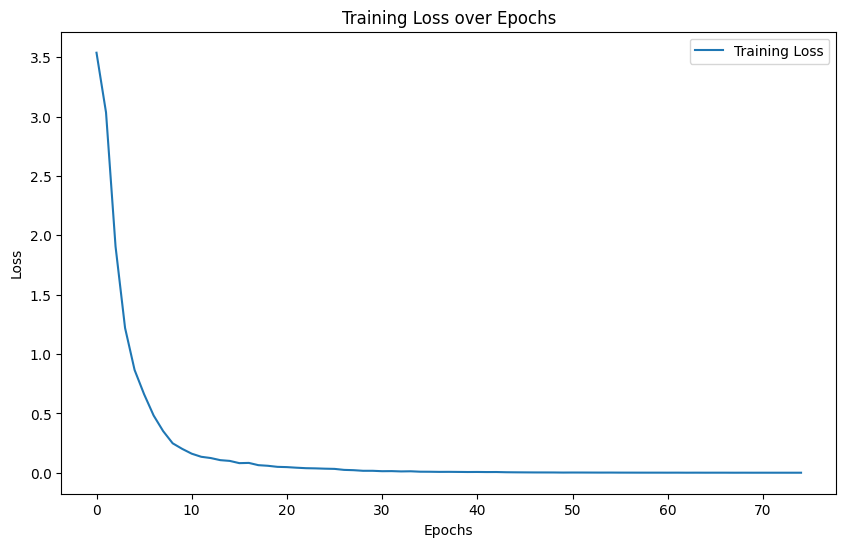

In [ ]:
# prompt: plot hist of training lossess train_losses and save it as image in my local

import matplotlib.pyplot as plt

# Assuming train_losses is a list of training losses obtained during training
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

# Save the plot as an image in your local directory
plt.savefig('training_loss_plot.png')

plt.show()

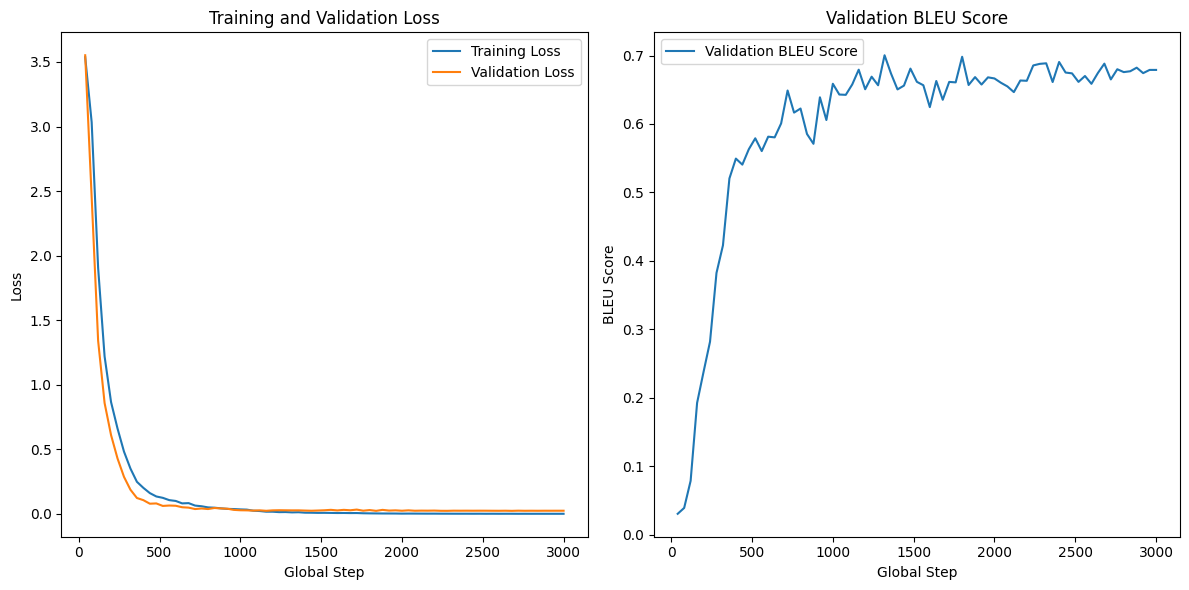

In [ ]:
# prompt: plot test metrics

# Assuming 'all_metrics' is a list of dictionaries containing 'global_step', 'train_loss', 'val_loss', and 'val_bleu_score'
if 'all_metrics' in locals():
  df_metrics = pd.DataFrame(all_metrics)

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.plot(df_metrics['global_step'], df_metrics['train_loss'], label='Training Loss')
  plt.plot(df_metrics['global_step'], df_metrics['val_loss'], label='Validation Loss')
  plt.xlabel('Global Step')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(df_metrics['global_step'], df_metrics['val_bleu_score'], label='Validation BLEU Score')
  plt.xlabel('Global Step')
  plt.ylabel('BLEU Score')
  plt.title('Validation BLEU Score')
  plt.legend()

  plt.tight_layout()
  plt.savefig('training_metrics_plot.png')
  plt.show()

In [ ]:

from peft import get_peft_config, PeftModel, PeftConfig, get_peft_model, LoraConfig, TaskType
from transformers import AutoModelForCausalLM

import torch
from transformers.trainer_callback import TrainerCallback
import os
from transformers import BitsAndBytesConfig

In [ ]:

from torch.nn.parallel import DistributedDataParallel as DDP
import torch


# Rename the file
checkpoint_dir = "/content/checkpoints/checkpoint_step_1840"
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import torch.distributed as dist

# Initialize process group, setting up distributed backend
# dist.init_process_group(backend='nccl')  # or 'gloo' if 'nccl' is not available

model = VisionEncoderDecoderModel.from_pretrained("DGurgurov/im2latex").to(device)
tokenizer = AutoTokenizer.from_pretrained("DGurgurov/im2latex")

feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-base-patch4-window7-224-in22k") # using the original feature extractor for now
tokenizer.pad_token = tokenizer.eos_token
# Load the PeftModel correctly and assign it to a variable
loaded_model = PeftModel.from_pretrained(model, checkpoint_dir)  # Assign to loaded_model

device = torch.device(f"cuda:{dist.get_rank()}")
print(device)
device='cuda:0'
loaded_model = loaded_model.to(device)
# prepare an image
image = Image.open("/content/image (1).png").convert('RGB')
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values

# Move pixel_values to the same device as the model
pixel_values = pixel_values.to(device) # Assuming 'device' is defined as 'cuda:0'

# generate LaTeX formula
generated_ids = loaded_model.generate(pixel_values)
generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print("Generated LaTeX formula:", generated_texts[0])
# evaluating on test set
# Use the loaded_model instance for evaluation
test_loss, test_bleu_scores = evaluate(loaded_model, test_dataloader, device, tokenizer, bleu_metric, stage='final')
print(f"Test Loss: {test_loss}")
print(f"Test BLEU Score: {test_bleu_scores}")

if master_process:
    metrics_test = {
            "test_losses": test_loss,
            "test_bleu_scores": test_bleu_scores
        }
    with open("test_metrics.json", "w") as f:
        json.dump(metrics_test, f)



cuda:0
Generated LaTeX formula: \sqrt { b ^ { 2 } - 4 e }


Evaluation: 100%|██████████| 4/4 [00:13<00:00,  3.38s/it]

Test Loss: 0.011312849936075509
Test BLEU Score: 0.6470673531293869


In [ ]:
from transformers import VisionEncoderDecoderModel, AutoTokenizer, AutoFeatureExtractor
import torch
from PIL import Image

# load model, tokenizer, and feature extractor
model = VisionEncoderDecoderModel.from_pretrained("DGurgurov/im2latex").to(device)
tokenizer = AutoTokenizer.from_pretrained("DGurgurov/im2latex")
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/swin-base-patch4-window7-224-in22k") # using the original feature extractor for now

# prepare an image
image = Image.open("/content/image (1).png").convert('RGB')
pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values

# Move pixel_values to the same device as the model
pixel_values = pixel_values.to(device) # Assuming 'device' is defined as 'cuda:0'

# generate LaTeX formula
generated_ids = loaded_model.generate(pixel_values)
generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print("Generated LaTeX formula by fine tuned model :", generated_texts[0])

# generate LaTeX formula
generated_ids = model.generate(pixel_values)
generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

print("Generated LaTeX formula by model :", generated_texts[0])

Generated LaTeX formula by fine tuned model : \sqrt { b ^ { 2 } - 4 e }
Generated LaTeX formula by model : \begin{align*}\Bigg\vert \displaystyle \sqrt{ \Bigg[\displaystyle\widehat{\mathcal{D}} ~\Bigg] } ~\mbox{\boldmath $ \sum$} ~\smashteq~ \display!\bigotimes\bigg\slash ~\display!{\mathbf{\mathord{\left( \, } \right. } \kern-\nulldelimiterspace} \bigg(\,\, \displayline{\Bigg)} }~\endbigg{} \endlabel{3}


In [ ]:
# Save the entire model and tokenizer
loaded_model.save_pretrained("/content/save_model")
tokenizer.save_pretrained("/content/save_model")


('/content/save_model/tokenizer_config.json',
 '/content/save_model/special_tokens_map.json',
 '/content/save_model/vocab.json',
 '/content/save_model/merges.txt',
 '/content/save_model/added_tokens.json',
 '/content/save_model/tokenizer.json')

In [ ]:
# prompt: zip and download save_model folder

import shutil
import os

def zip_and_download_folder(folder_path, zip_filename):
  """Zips a folder and downloads it.

  Args:
    folder_path: Path to the folder to zip.
    zip_filename: Name of the zip file to create.
  """
  shutil.make_archive(zip_filename, 'zip', folder_path)
  from google.colab import files
  files.download(zip_filename + '.zip')


# Assuming 'save_model' is the folder you want to zip and download
zip_and_download_folder('/content/save_model', 'save_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Saving the model and tokenizer
loaded_model.save_pretrained("/content/save_model")
tokenizer.save_pretrained("/content/save_model")

# Loading the model and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("/content/save_model")
tokenizer = AutoTokenizer.from_pretrained("/content/save_model")

# Check size after saving
saved_model_size = sum(os.path.getsize(os.path.join("/content/save_model", f)) for f in os.listdir("/content/save_model"))
print(f"Total saved model size: {saved_model_size / (1024 * 1024):.2f} MB")


Total saved model size: 15.04 MB
